<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-45.787796  ,   0.19784594, -13.6583    ,  10.941376  ,
          7.132572  ,  22.440763  , -20.241795  ,   5.4403334 ,
        -37.633423  ,  -5.7818785 ]], dtype=float32)

In [9]:
tf.nn.softmax(predictions).numpy()

array([[2.3372640e-30, 2.1878570e-10, 2.1007349e-16, 1.0136192e-05,
        2.2476698e-07, 9.9998963e-01, 2.9053396e-19, 4.1381103e-08,
        8.1303094e-27, 5.5342433e-13]], dtype=float32)

In [10]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.7496 - acc: 0.9118
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1106 - acc: 0.9668
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - acc: 0.9735
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0756 - acc: 0.9765
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0680 - acc: 0.9799
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0664 - acc: 0.9806
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0581 - acc: 0.9836
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0626 - acc: 0.9815
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0573 - acc: 0.9838
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0474 - acc: 0.9863
Epoch 11/20
469/469 [============================

In [12]:
history.history

{'loss': [1.749609112739563,
  0.1106211319565773,
  0.08874106407165527,
  0.07561717927455902,
  0.06797591596841812,
  0.06637528538703918,
  0.058092597872018814,
  0.06260458379983902,
  0.057294052094221115,
  0.04743577912449837,
  0.04654974862933159,
  0.05981273204088211,
  0.05350596085190773,
  0.04728683829307556,
  0.05444011464715004,
  0.042576614767313004,
  0.043442804366350174,
  0.04708782210946083,
  0.03654449060559273,
  0.04550014063715935],
 'acc': [0.9117666482925415,
  0.966783344745636,
  0.9735000133514404,
  0.9764999747276306,
  0.9798666834831238,
  0.9806333184242249,
  0.9836166501045227,
  0.9815499782562256,
  0.9838333129882812,
  0.9862833619117737,
  0.9873833060264587,
  0.984416663646698,
  0.98580002784729,
  0.9876333475112915,
  0.9871833324432373,
  0.9889333248138428,
  0.9891666769981384,
  0.9890166521072388,
  0.9907166957855225,
  0.9893500208854675]}

In [13]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1712 - acc: 0.9729


In [14]:
print(test_acc)

0.9728999733924866


In [21]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))

In [16]:
# y_pred = y_pred.numpy().argmax(axis=1)

In [ ]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [17]:
result = np.where(y_pred == 8)
print(result[0].shape)

(975,)


In [19]:
confusion_matrix(y_test, y_pred)

array([[ 966,    1,    1,    1,    0,    2,    4,    1,    1,    3],
       [   0, 1116,    4,    1,    0,    0,    2,    3,    9,    0],
       [   0,    0,  995,   16,    3,    0,    1,    4,   12,    1],
       [   0,    0,    2,  982,    0,    5,    0,    1,    1,   19],
       [   1,    0,    2,    0,  960,    0,    7,    2,    2,    8],
       [   2,    0,    0,   16,    2,  856,    8,    0,    2,    6],
       [   7,    2,    0,    1,    3,    4,  938,    0,    3,    0],
       [   2,    0,    4,    5,    3,    0,    0, 1003,    5,    6],
       [   4,    0,    1,    5,    3,    5,    7,    3,  937,    9],
       [   1,    1,    0,    0,   11,    2,    1,   14,    3,  976]])

Instructions for updating:
Use tf.identity instead.


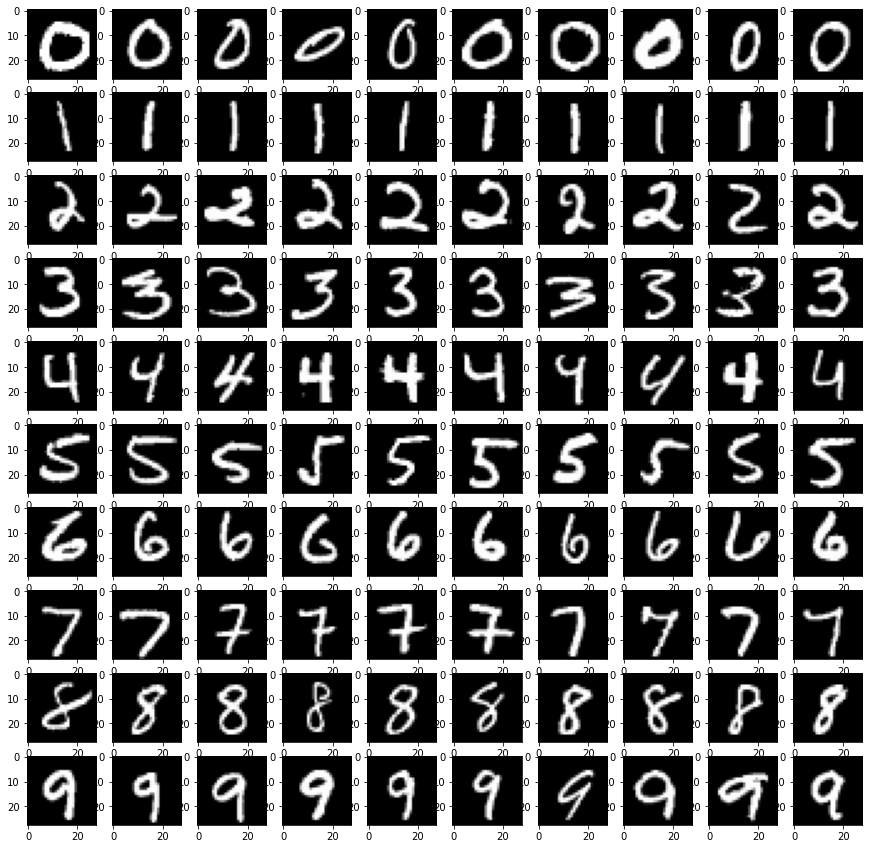

In [22]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = y_pred[:,i].cpu().numpy()
    result_idx = (-result).argsort()[:10]
    for j in range(10):
      axs[i,j].imshow(x_test[result_idx[j]], cmap=plt.get_cmap('gray'))
plt.show()

In [23]:
total_idx = np.array(range(0,len(x_test)))
random_idxs = np.random.choice(a=total_idx,size=1000,replace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

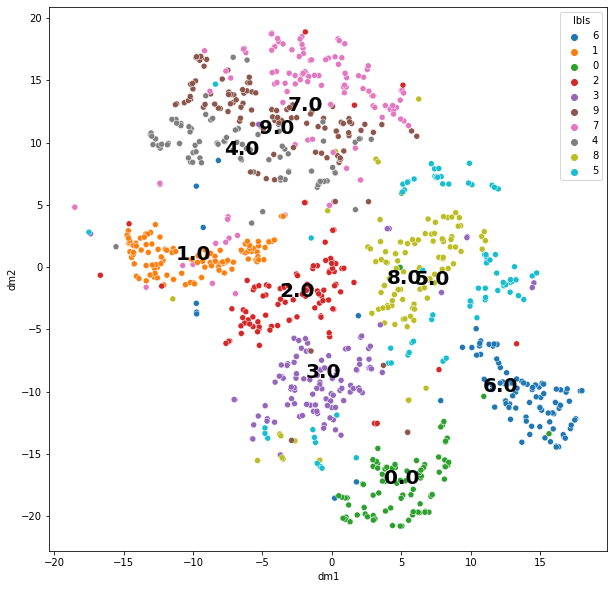

In [25]:
test_imgs = x_test[random_idxs]
test_labels = y_test[random_idxs]

#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(test_imgs.reshape([1000,28*28]))
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

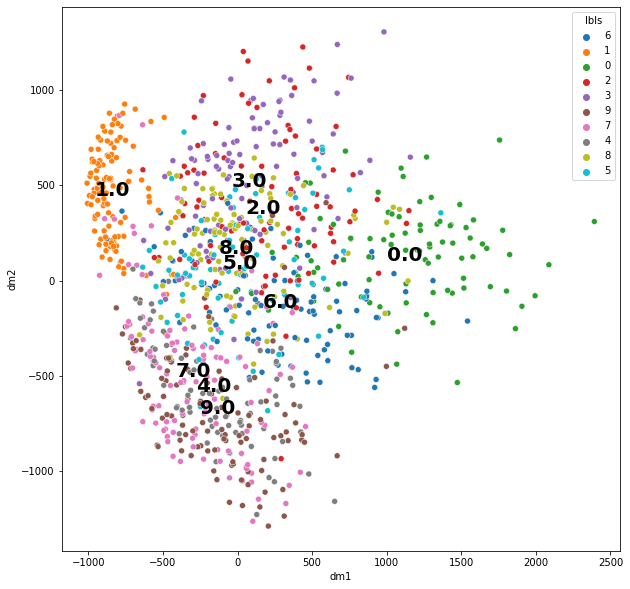

In [26]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(test_imgs.reshape([1000,28*28]))

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [27]:
model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model
act_model1 = Model(inputs=[model.input], outputs=[model.layers[1].output,])
act_model1.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h1_activations = act_model1.predict(test_imgs)

In [59]:
print(h1_activations.shape)

(1000, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

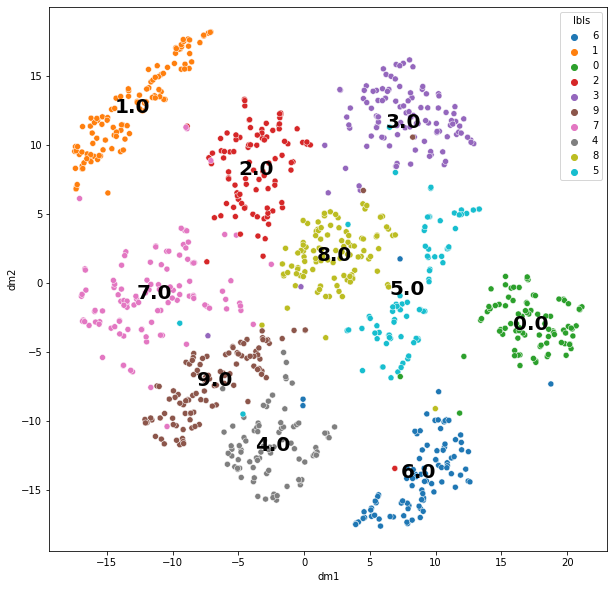

In [60]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h1_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

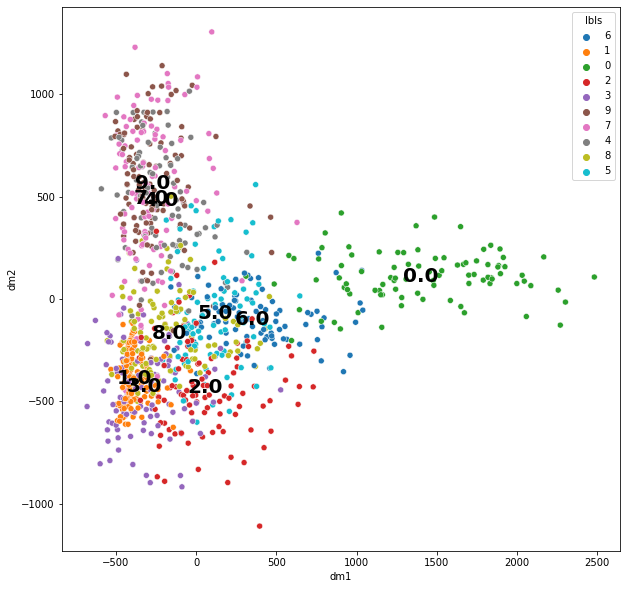

In [61]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h1_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [62]:
act_model2 = Model(inputs=[model.input], outputs=[model.layers[2].output,])
act_model2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h2_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

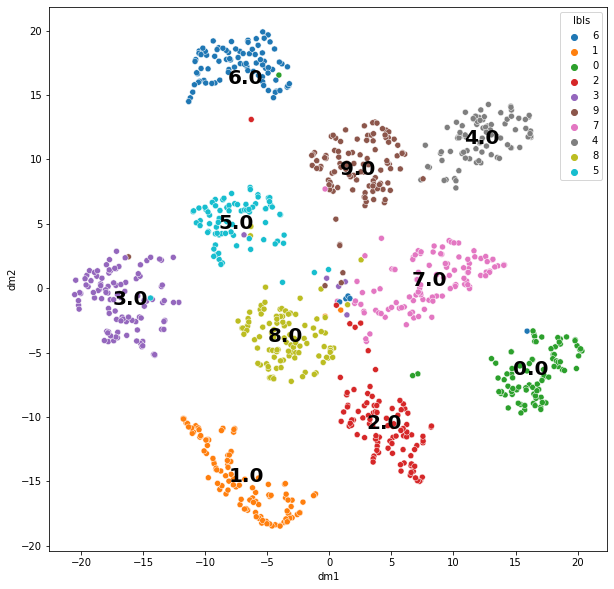

In [63]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h2_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

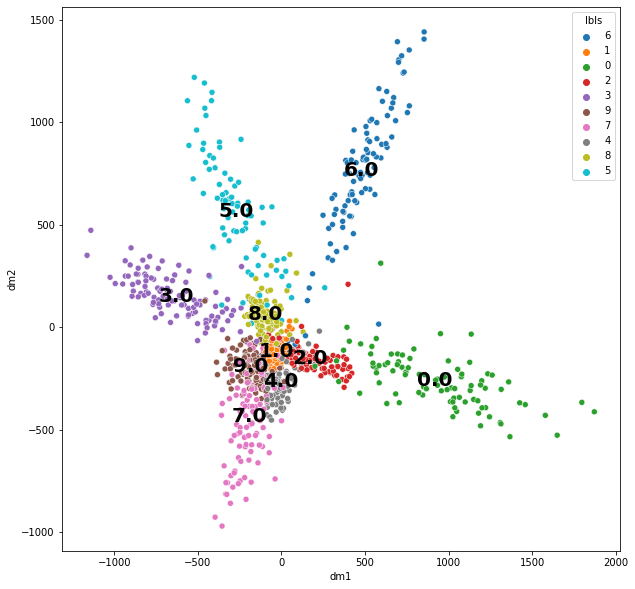

In [64]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h2_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [65]:
act_model3 = Model(inputs=[model.input], outputs=[model.layers[3].output,])
act_model3.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h3_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

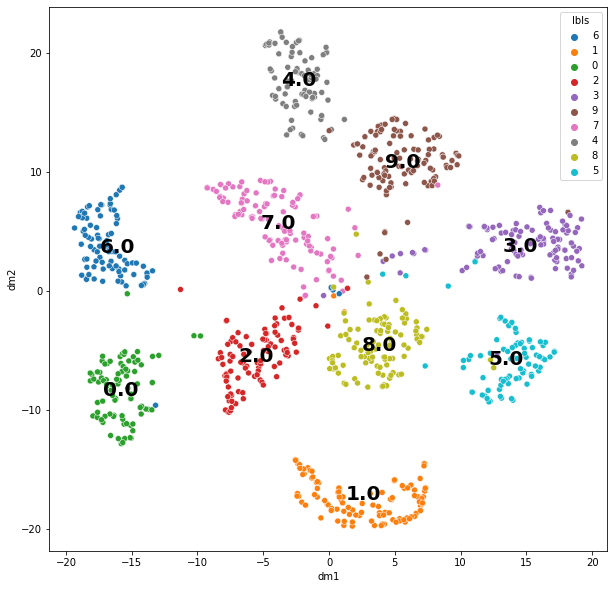

In [66]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h3_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

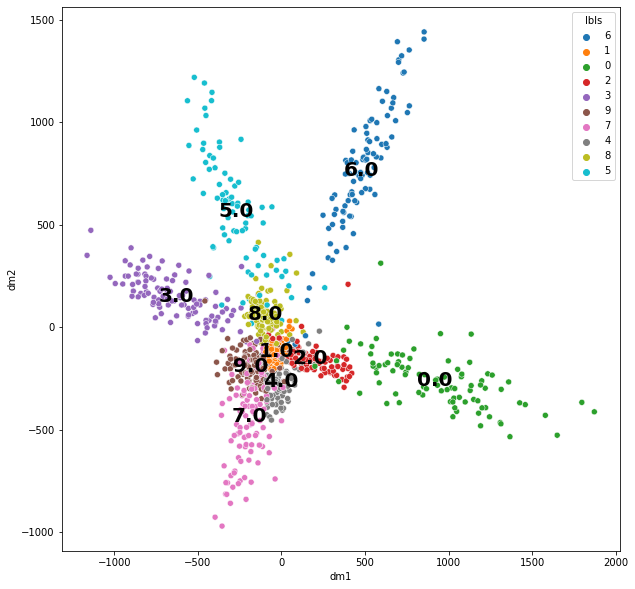

In [67]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h3_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [68]:
act_model4 = Model(inputs=[model.input], outputs=[model.layers[4].output,])
act_model4.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h4_activations = act_model4.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

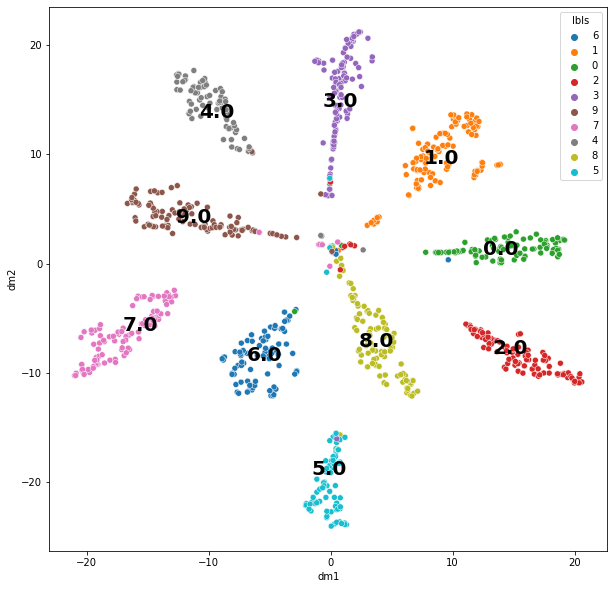

In [69]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h4_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

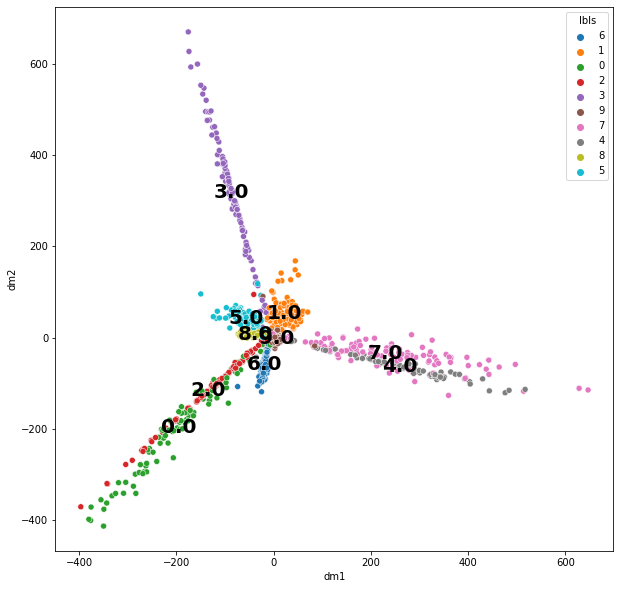

In [70]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h4_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [71]:
act_model5 = Model(inputs=[model.input], outputs=[model.layers[5].output,])
act_model5.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h5_activations = act_model5.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

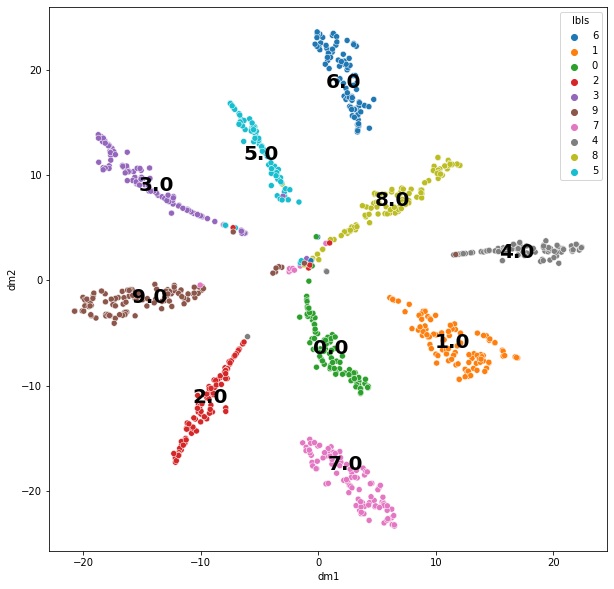

In [72]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h5_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

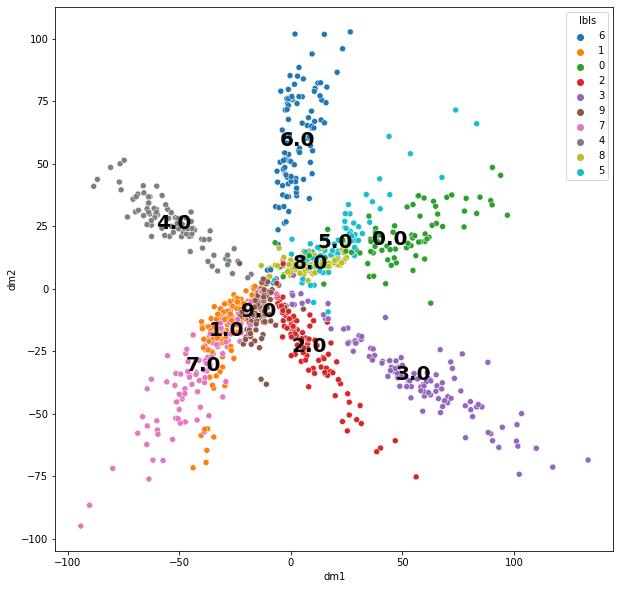

In [73]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h5_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

Problem 2: Adult Optimization

In [130]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
xavier_initializer = tf.keras.initializers.GlorotUniform(seed=None)
he_initializer = tf.keras.initializers.HeUniform(seed=None)

In [123]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10)
])

In [124]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])

In [125]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10)
])

In [135]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])

In [136]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10)
])

In [137]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
# print("[INFO] training network...")
model1.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [81]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 2.3036 - accuracy: 0.1063 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1084 - val_loss: 2.3064 - val_accuracy: 0.0958
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3039 - accuracy: 0.1070 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3034 - accuracy: 0.1064 - val_loss: 2.3043 - val_accuracy: 0.1028
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3036 - accuracy: 0.1094 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1073 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3034 - accuracy: 0.1068 - val_loss: 2.3038 - val_accuracy: 0.0958

In [83]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9773 - accuracy: 0.7256 - val_loss: 0.9039 - val_accuracy: 0.7488
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.8516 - accuracy: 0.7681 - val_loss: 0.7976 - val_accuracy: 0.7826
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.7559 - accuracy: 0.7983 - val_loss: 0.7134 - val_accuracy: 0.8072
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6822 - accuracy: 0.8204 - val_loss: 0.6483 - val_accuracy: 0.8338
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6224 - accuracy: 0.8392 - val_loss: 0.5947 - val_accuracy: 0.8468
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5722 - accuracy: 0.8543 - val_loss: 0.5510 - val_accuracy: 0.8608
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5292 - accuracy: 0.8659 - val_loss: 0.5140 - val_accuracy: 0.8703

In [84]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.8976 - accuracy: 0.7306 - val_loss: 0.2907 - val_accuracy: 0.9126
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.9343 - val_loss: 0.1521 - val_accuracy: 0.9519
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9577 - val_loss: 0.1330 - val_accuracy: 0.9575
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 0.1006 - val_accuracy: 0.9671
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0797 - accuracy: 0.9761 - val_loss: 0.0880 - val_accuracy: 0.9735
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0633 - accuracy: 0.9809 - val_loss: 0.1428 - val_accuracy: 0.9547
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0790 - val_accuracy: 0.9754

In [138]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/100
264/469 [===============>..............] - ETA: 0s - loss: nan - accuracy: 0.1001

KeyboardInterrupt: ignored

In [105]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/100
469/469 [====================

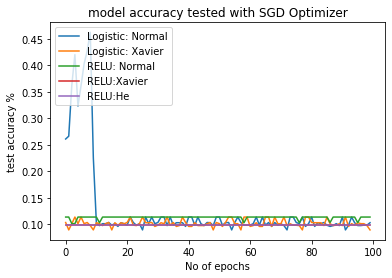

In [106]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with SGD Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [93]:
model1.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [94]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 2.1719 - accuracy: 0.1684 - val_loss: 1.9332 - val_accuracy: 0.2609
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 1.7839 - accuracy: 0.2947 - val_loss: 1.7296 - val_accuracy: 0.2662
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 1.6614 - accuracy: 0.3395 - val_loss: 1.6693 - val_accuracy: 0.3629
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 1.6073 - accuracy: 0.3782 - val_loss: 1.5273 - val_accuracy: 0.4202
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 1.6002 - accuracy: 0.3749 - val_loss: 1.7971 - val_accuracy: 0.3232
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 1.6721 - accuracy: 0.3539 - val_loss: 1.6563 - val_accuracy: 0.3616
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 1.7205 - accuracy: 0.3415 - val_loss: 1.6288 - val_accuracy: 0.4030

In [95]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 3.5452 - accuracy: 0.1035 - val_loss: 2.4056 - val_accuracy: 0.1032
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3856 - accuracy: 0.1009 - val_loss: 2.4197 - val_accuracy: 0.0892
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3923 - accuracy: 0.1020 - val_loss: 2.3258 - val_accuracy: 0.1010
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.4053 - accuracy: 0.1020 - val_loss: 2.3670 - val_accuracy: 0.1135
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3945 - accuracy: 0.1015 - val_loss: 2.4326 - val_accuracy: 0.1010
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3890 - accuracy: 0.1002 - val_loss: 2.4642 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3939 - accuracy: 0.1011 - val_loss: 2.3587 - val_accuracy: 0.1010

In [96]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 148.7440 - accuracy: 0.1123 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3020 - accuracy: 0.1099 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy: 0.1010
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3019 - accuracy: 0.1109 - val_loss: 2.3019 - val_accuracy: 0.1010
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1102 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1113 - val_loss: 2.3020 - val_accuracy: 0.11

In [97]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 764.7911 - accuracy: 0.1093 - val_loss: 3.1620 - val_accuracy: 0.0963
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3001 - accuracy: 0.1105 - val_loss: 3.1570 - val_accuracy: 0.1151
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.4317 - accuracy: 0.1110 - val_loss: 3.1453 - val_accuracy: 0.1033
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3008 - accuracy: 0.1118 - val_loss: 3.1446 - val_accuracy: 0.1140
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3010 - accuracy: 0.1118 - val_loss: 3.1459 - val_accuracy: 0.1033
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3008 - accuracy: 0.1114 - val_loss: 3.1454 - val_accuracy: 0.1140
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3008 - accuracy: 0.1116 - val_loss: 3.1447 - val_accuracy: 0.11

In [98]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/100
469/469 [====================

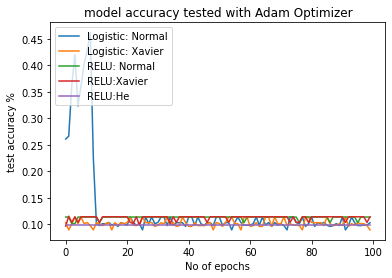

In [99]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with Adam Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [ ]:
# w_value = xavier_initializer(shape=(784,512))
# b_value = xavier_initializer(shape=(512,))
# model1.layers[1].set_weights([w_value,b_value])
# w_value1 = xavier_initializer(shape=(512,512))
# model1.layers[2].set_weights([w_value1,b_value])
# w_value2 = xavier_initializer(shape=(512,512))
# model1.layers[3].set_weights([w_value2,b_value])
# w_value3 = xavier_initializer(shape=(512,512))
# model1.layers[4].set_weights([w_value3,b_value])
# w_value4 = xavier_initializer(shape=(512,10))
# b_value4 = xavier_initializer(shape=(10,))
# model1.layers[5].set_weights([w_value4,b_value4])